<a href="https://colab.research.google.com/github/chetan-parthiban/Conceptors/blob/master/ConceptorsExperiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimenting With Conceptors
This notebook contains several experiments to gain better intuition for what conceptors are doing as well as to understand the alpha hyperparameter

In [0]:
# Import Dependencies
import numpy as np
from numpy.linalg import inv, eig
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse as ellipse
from sklearn.datasets import make_spd_matrix as random_semipositivedefinite
%matplotlib inline

In [0]:
######################################################
## Define Some Basic Functions Regarding Conceptors ##
######################################################


# An implementation of conceptors
# Conceptors can be computed: R*(R + alpha*I)'(Note we use ' to denote inverse)
# where R denotes the correlation matrix for our data
def get_conceptor(x, alpha):
    k = x.shape[1] 
    corr = (x @ x.T)*(1/k)
    print(corr)
    return corr @ inv(corr + (1/alpha**2)*np.eye(x.shape[0]))

# Function to convert an array of eigenvalues and eigenvectors to their 
# corresponding matrix. Simply computes M = SDS' where S and S' are the
# change of basis matrices from standard basis to the eigenvectors and
# vice versa. D is just a diagonal matrix with the eigenvalues. 
def eigToMat(eig,vec):
    D = np.diag(eig)
    return np.matmul(vec,np.matmul(D,inv(vec)))

# Functions corresponding to boolean operations applied to conceptors
def NOT(x):
    return np.eye(x.shape[0]) - x

def AND(x,y):
    return inv((inv(x) + inv(y) - np.eye(x.shape[0])))

def OR(x,y):
    return NOT(AND(NOT(x),NOT(y)))

# Examining Visually the Impact of NOT, AND, and OR

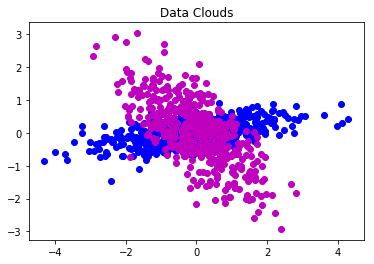

In [122]:
# First lets create a clouds of data points. We will us 2 dimensions for easier
# visualizations of our data. We will create two different clouds of data
N = 50000
r = -np.pi/5
rot = [[np.cos(r), -np.sin(r)],[np.sin(r),np.cos(r)]]
x = np.random.multivariate_normal([0,0],[[1,0.9],
                                         [0.9,1]],N).T
y = np.random.multivariate_normal([0,0],[[1,-0.7],
                                         [-0.7,1]],N).T
x = rot @ x
plt.title('Data Clouds')
plt.scatter(x[0][::100],x[1][::100], c = 'b')
plt.scatter(y[0][::100],y[1][::100], c = 'm')
plt.show()
print("\n")

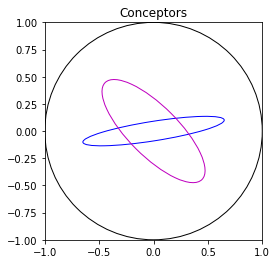

In [123]:
# Now lets generate some conceptors for both of these data sets and plot their
# Corresponding Ellipses (in the corresponding colors)
alpha = 1
conceptor_x = get_conceptor(x, alpha)
conceptor_y = get_conceptor(y, alpha)

eigx, vecx = eig(conceptor_x)
eigy, vecy = eig(conceptor_y)

thetax = np.arccos(np.dot(vecx[:,0],[1,0]))
thetay = -np.arccos(np.dot(vecy[:,0],[1,0]))

# Plot
ax = plt.subplot(111, aspect = 'equal')
plt.title('Conceptors')

ellx = ellipse((0,0), 2*eigx[0], 2*eigx[1], np.rad2deg(thetax), edgecolor = 'b', facecolor = 'none')
elly = ellipse((0,0), 2*eigy[0], 2*eigy[1], np.rad2deg(thetay), edgecolor = 'm', facecolor = 'none')
circ = ellipse((0,0),2,2, edgecolor = 'k', facecolor = 'none')

ax.add_artist(ellx)
ax.add_artist(elly)
ax.add_artist(circ)

# Uncomment following lines to also visualize principal axes of ellipses
# firstx = plt.arrow(0,0,eigx[0]*vecx[0,0],eigx[0]*vecx[1,0], color = 'b')
# secondx = plt.arrow(0,0,eigx[1]*vecx[0,1],eigx[1]*vecx[1,1], color = 'b')

# firsty = plt.arrow(0,0,eigy[0]*vecy[0,0],eigy[0]*vecy[1,0], color = 'm')
# secondy = plt.arrow(0,0,eigy[1]*vecy[0,1],eigy[1]*vecy[1,1], color = 'm')

# ax.add_artist(firstx)
# ax.add_artist(secondx)
# ax.add_artist(firsty)
# ax.add_artist(secondy)

plt.xlim((-1,1))
plt.ylim((-1,1))
plt.show()

**Examining NOT** <br>
NOT computes the conceptor with the same eigenvectors but with eigenvalues transformed by f(x) = 1-x

Eigenvalues/Vectors of Conceptor X
[0.65800112 0.08975058] 
 
 [[ 0.98777822 -0.1558659 ]
 [ 0.1558659   0.98777822]] 
 

Eigenvalues/Vectors of Conceptor NOT(X)
[0.34199888 0.91024942] 
 
 [[-0.98777822  0.1558659 ]
 [-0.1558659  -0.98777822]] 
 

Eigenvalues/Vectors of Concepor OR(X, NOT(X))
[0.70961807 0.91103669] 
 
 [[-0.98777822  0.1558659 ]
 [-0.1558659  -0.98777822]]


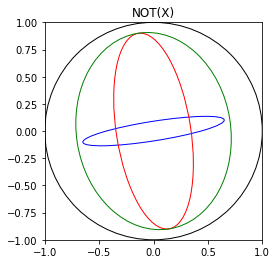

Eigenvalues/Vectors of Conceptor Y
[0.22924897 0.63012345] 
 
 [[-0.70740157  0.70681187]
 [-0.70681187 -0.70740157]] 
 

Eigenvalues/Vectors of Conceptor NOT(Y)
[0.77075103 0.36987655] 
 
 [[ 0.70740157 -0.70681187]
 [ 0.70681187  0.70740157]] 
 

Eigenvalues/Vectors of Concepor OR(Y, NOT(Y))
[0.78538496 0.69610363] 
 
 [[ 0.70740157 -0.70681187]
 [ 0.70681187  0.70740157]]


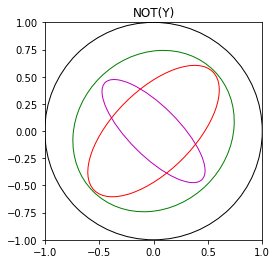

In [124]:
# First lets visualize the effect of the NOT operator. We can see that the NOT
# Operator results in the conceptor represented by the same eigenvectors, with
# The eigenvalue e being replaced with 1-e
# We will also visualize OR(NOT(X),X) in green
a = NOT(conceptor_x)
eiga, veca = eig(a)
thetaa = -np.arccos(np.dot(veca[:,0]*(eiga[0]/abs(eiga[0])),[1,0]))

p = OR(conceptor_x, a)
eigp, vecp = eig(p)
thetap = -np.arccos(np.dot(vecp[:,0]*(eigp[0]/abs(eigp[0])),[1,0]))

print('Eigenvalues/Vectors of Conceptor X')
print(eigx, '\n \n', vecx, '\n \n')
print('Eigenvalues/Vectors of Conceptor NOT(X)')
print(eiga, '\n \n', veca, '\n \n')
print('Eigenvalues/Vectors of Concepor OR(X, NOT(X))')
print(eigp, '\n \n', vecp)

# Plot
ax = plt.subplot(111, aspect = 'equal')
plt.title('NOT(X)')

ellx = ellipse((0,0), 2*eigx[0], 2*eigx[1], np.rad2deg(thetax), edgecolor = 'b', facecolor = 'none')
ella = ellipse((0,0), 2*eiga[0], 2*eiga[1], np.rad2deg(thetaa), edgecolor = 'r', facecolor = 'none')
ellp = ellipse((0,0), 2*eigp[0], 2*eigp[1], np.rad2deg(thetap), edgecolor = 'g', facecolor = 'none')
circ = ellipse((0,0),2,2, edgecolor = 'k', facecolor = 'none')

ax.add_artist(ellx)
ax.add_artist(ella)
ax.add_artist(ellp)
ax.add_artist(circ)

plt.xlim((-1,1))
plt.ylim((-1,1))
plt.show()

# Now lets check it for the other conceptor
a = NOT(conceptor_y)
eiga, veca = eig(a)
thetaa = np.arccos(np.dot(veca[:,0]*(eiga[0]/abs(eiga[0])),[1,0]))

p = OR(conceptor_y, a)
eigp, vecp = eig(p)
thetap = np.arccos(np.dot(vecp[:,0]*(eigp[0]/abs(eigp[0])),[1,0]))

print('Eigenvalues/Vectors of Conceptor Y')
print(eigy, '\n \n', vecy, '\n \n')
print('Eigenvalues/Vectors of Conceptor NOT(Y)')
print(eiga, '\n \n', veca, '\n \n')
print('Eigenvalues/Vectors of Concepor OR(Y, NOT(Y))')
print(eigp, '\n \n', vecp)

# Plot
ax = plt.subplot(111, aspect = 'equal')
plt.title('NOT(Y)')

elly = ellipse((0,0), 2*eigy[0], 2*eigy[1], np.rad2deg(thetay), edgecolor = 'm', facecolor = 'none')
ella = ellipse((0,0), 2*eiga[0], 2*eiga[1], np.rad2deg(thetaa), edgecolor = 'r', facecolor = 'none')
ellp = ellipse((0,0), 2*eigp[0], 2*eigp[1], np.rad2deg(thetap), edgecolor = 'g', facecolor = 'none')
circ = ellipse((0,0),2,2, edgecolor = 'k', facecolor = 'none')

ax.add_artist(elly)
ax.add_artist(ella)
ax.add_artist(ellp)
ax.add_artist(circ)

plt.xlim((-1,1))
plt.ylim((-1,1))
plt.show()

**Examining AND and OR** <br>
AND computes the largest conceptor contained in both conceptors<br>
NOT computes the smallest conceptor containing both conceptors

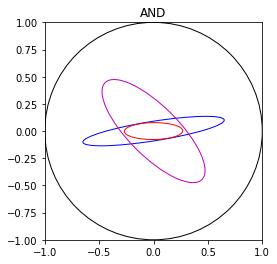

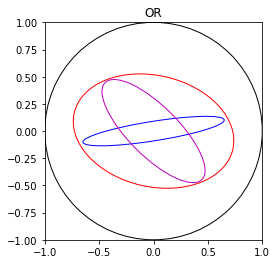

In [125]:
# Now lets see what the AND operator does (additional conceptors will be 
# plotted in red for clarity) We can see that the AND operator computes the
# largest conceptor contained in the intersection of the two conceptors

a = AND(conceptor_x,conceptor_y)
eiga, veca = eig(a)
thetaa = np.arccos(np.dot(veca[:,0]*(eiga[0]/abs(eiga[0])),[1,0]))

# Plot
ax = plt.subplot(111, aspect = 'equal')
plt.title('AND')

ellx = ellipse((0,0), 2*eigx[0], 2*eigx[1], np.rad2deg(thetax), edgecolor = 'b', facecolor = 'none')
elly = ellipse((0,0), 2*eigy[0], 2*eigy[1], np.rad2deg(thetay), edgecolor = 'm', facecolor = 'none')
ella = ellipse((0,0), 2*eiga[0], 2*eiga[1], np.rad2deg(thetaa), edgecolor = 'r', facecolor = 'none')

circ = ellipse((0,0),2,2, edgecolor = 'k', facecolor = 'none')

ax.add_artist(ellx)
ax.add_artist(elly)
ax.add_artist(ella)
ax.add_artist(circ)

plt.xlim((-1,1))
plt.ylim((-1,1))
plt.show()

# Now lets check the OR operator. This computes the smallest conceptor that
# contains both of the argument conceptors

a = OR(conceptor_x,conceptor_y)
eiga, veca = eig(a)
thetaa = -np.arccos(np.dot(veca[:,0]*(eiga[0]/abs(eiga[0])),[1,0]))

# Plot
ax = plt.subplot(111, aspect = 'equal')
plt.title('OR')

ellx = ellipse((0,0), 2*eigx[0], 2*eigx[1], np.rad2deg(thetax), edgecolor = 'b', facecolor = 'none')
elly = ellipse((0,0), 2*eigy[0], 2*eigy[1], np.rad2deg(thetay), edgecolor = 'm', facecolor = 'none')
ella = ellipse((0,0), 2*eiga[0], 2*eiga[1], np.rad2deg(thetaa), edgecolor = 'r', facecolor = 'none')

circ = ellipse((0,0),2,2, edgecolor = 'k', facecolor = 'none')

ax.add_artist(ellx)
ax.add_artist(elly)
ax.add_artist(ella)
ax.add_artist(circ)

plt.xlim((-1,1))
plt.ylim((-1,1))
plt.show()

**Examining AND vs UNIONS**  <br>
Clearly AND(X,Y) is different than get_conceptor(UNION(X,Y)))

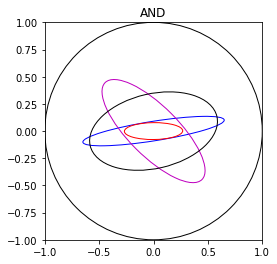

Eigenvalues/Vectors of Conceptor X
[0.65800112 0.08975058] 
 
 [[ 0.98777822 -0.1558659 ]
 [ 0.1558659   0.98777822]] 
 

Eigenvalues/Vectors of Conceptor Y
[0.22924897 0.63012345] 
 
 [[-0.70740157  0.70681187]
 [-0.70681187 -0.70740157]] 
 

Eigenvalues/Vectors of Concepor AND(X,Y)
[0.2682229  0.07762431] 
 
 [[ 0.99994737 -0.01025901]
 [ 0.01025901  0.99994737]] 
 

Eigenvalues/Vectors of Concepor XUY
[0.5981325  0.34358694] 
 
 [[ 0.97449448  0.22441146]
 [-0.22441146  0.97449448]] 
 



In [126]:
# Lets plot the and operator vs the conceptor computed from the union of two
# equal sized data sets

a = AND(conceptor_x,conceptor_y)
eiga, veca = eig(a)
thetaa = np.arccos(np.dot(veca[:,0]*(eiga[0]/abs(eiga[0])),[1,0]))

union = np.hstack((x, y))
u = get_conceptor(union, alpha = 1)
eigu, vecu = eig(u)
thetau = np.arccos(np.dot(vecu[:,0],[1,0]))

# Plot
ax = plt.subplot(111, aspect = 'equal')
plt.title('AND')

ellx = ellipse((0,0), 2*eigx[0], 2*eigx[1], np.rad2deg(thetax), edgecolor = 'b', facecolor = 'none')
elly = ellipse((0,0), 2*eigy[0], 2*eigy[1], np.rad2deg(thetay), edgecolor = 'm', facecolor = 'none')
ella = ellipse((0,0), 2*eiga[0], 2*eiga[1], np.rad2deg(thetaa), edgecolor = 'r', facecolor = 'none')
ellu = ellipse((0,0), 2*eigu[0], 2*eigu[1], np.rad2deg(thetau), edgecolor = 'k', facecolor = 'none')
circ = ellipse((0,0),2,2, edgecolor = 'k', facecolor = 'none')

ax.add_artist(ellx)
ax.add_artist(elly)
ax.add_artist(ella)
ax.add_artist(ellu)
ax.add_artist(circ)

plt.xlim((-1,1))
plt.ylim((-1,1))
plt.show()

print('Eigenvalues/Vectors of Conceptor X')
print(eigx, '\n \n', vecx, '\n \n')
print('Eigenvalues/Vectors of Conceptor Y')
print(eigy, '\n \n', vecy, '\n \n')
print('Eigenvalues/Vectors of Concepor AND(X,Y)')
print(eiga, '\n \n', veca, '\n \n')
print('Eigenvalues/Vectors of Concepor XUY')
print(eigu, '\n \n', vecu, '\n \n')


# Testing Distributions without zero-mean

In [0]:
def acc_conceptor(x, alpha):
    k = x.shape[1] 
    
    means = np.mean(x, axis = 1)
    x = (x - means[:,None])
    
    cov = (x @ x.T)*(1/k)
    return cov @ inv(cov + (1/alpha**2)*np.eye(x.shape[0]))

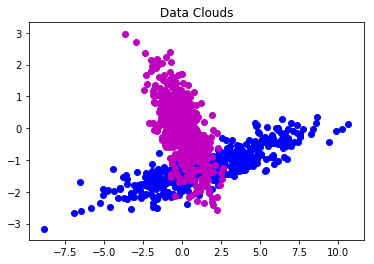



[[9.7 1.5]
 [1.5 0.3]]


In [191]:
# First lets create a clouds of data points. We will us 2 dimensions for easier
# visualizations of our data. We will create two different clouds of data
N = 50000
r = -np.pi/5
rot = [[np.cos(r), -np.sin(r)],[np.sin(r),np.cos(r)]]
x = np.random.multivariate_normal([2,0], [[5,4.9],
                                         [4.9,5]],N).T
y = np.random.multivariate_normal([0,0],[[1,-0.7],
                                         [-0.7,1]],N).T

x = rot @ x
plt.title('Data Clouds')
plt.scatter(x[0][::100],x[1][::100], c = 'b')
plt.scatter(y[0][::100],y[1][::100], c = 'm')
plt.show()
print("\n")
print(np.cov(x))

[[12.3 -0.4]
 [-0.4  1.7]]
[[ 1.  -0.7]
 [-0.7  1. ]]


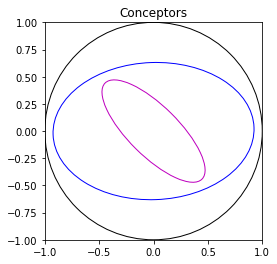

In [192]:
# Now lets generate some conceptors for both of these data sets and plot their
# Corresponding Ellipses (in the corresponding colors)
alpha = 1
conceptor_x = get_conceptor(x, alpha)
conceptor_y = get_conceptor(y, alpha)

eigx, vecx = eig(conceptor_x)
eigy, vecy = eig(conceptor_y)

thetax = np.arccos(np.dot(vecx[:,0],[1,0]))
thetay = -np.arccos(np.dot(vecy[:,0],[1,0]))

# Plot
ax = plt.subplot(111, aspect = 'equal')
plt.title('Conceptors')

ellx = ellipse((0,0), 2*eigx[0], 2*eigx[1], np.rad2deg(thetax), edgecolor = 'b', facecolor = 'none')
elly = ellipse((0,0), 2*eigy[0], 2*eigy[1], np.rad2deg(thetay), edgecolor = 'm', facecolor = 'none')
circ = ellipse((0,0),2,2, edgecolor = 'k', facecolor = 'none')

ax.add_artist(ellx)
ax.add_artist(elly)
ax.add_artist(circ)

# Uncomment following lines to also visualize principal axes of ellipses
# firstx = plt.arrow(0,0,eigx[0]*vecx[0,0],eigx[0]*vecx[1,0], color = 'b')
# secondx = plt.arrow(0,0,eigx[1]*vecx[0,1],eigx[1]*vecx[1,1], color = 'b')

# firsty = plt.arrow(0,0,eigy[0]*vecy[0,0],eigy[0]*vecy[1,0], color = 'm')
# secondy = plt.arrow(0,0,eigy[1]*vecy[0,1],eigy[1]*vecy[1,1], color = 'm')

# ax.add_artist(firstx)
# ax.add_artist(secondx)
# ax.add_artist(firsty)
# ax.add_artist(secondy)

plt.xlim((-1,1))
plt.ylim((-1,1))
plt.show()

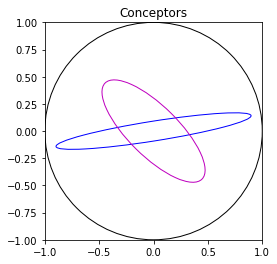

In [193]:
# Now lets generate some conceptors for both of these data sets and plot their
# Corresponding Ellipses (in the corresponding colors)
alpha = 1
conceptor_x = acc_conceptor(x, alpha)
conceptor_y = acc_conceptor(y, alpha)

eigx, vecx = eig(conceptor_x)
eigy, vecy = eig(conceptor_y)

thetax = np.arccos(np.dot(vecx[:,0],[1,0]))
thetay = -np.arccos(np.dot(vecy[:,0],[1,0]))

# Plot
ax = plt.subplot(111, aspect = 'equal')
plt.title('Conceptors')

ellx = ellipse((0,0), 2*eigx[0], 2*eigx[1], np.rad2deg(thetax), edgecolor = 'b', facecolor = 'none')
elly = ellipse((0,0), 2*eigy[0], 2*eigy[1], np.rad2deg(thetay), edgecolor = 'm', facecolor = 'none')
circ = ellipse((0,0),2,2, edgecolor = 'k', facecolor = 'none')

ax.add_artist(ellx)
ax.add_artist(elly)
ax.add_artist(circ)

# Uncomment following lines to also visualize principal axes of ellipses
# firstx = plt.arrow(0,0,eigx[0]*vecx[0,0],eigx[0]*vecx[1,0], color = 'b')
# secondx = plt.arrow(0,0,eigx[1]*vecx[0,1],eigx[1]*vecx[1,1], color = 'b')

# firsty = plt.arrow(0,0,eigy[0]*vecy[0,0],eigy[0]*vecy[1,0], color = 'm')
# secondy = plt.arrow(0,0,eigy[1]*vecy[0,1],eigy[1]*vecy[1,1], color = 'm')

# ax.add_artist(firstx)
# ax.add_artist(secondx)
# ax.add_artist(firsty)
# ax.add_artist(secondy)

plt.xlim((-1,1))
plt.ylim((-1,1))
plt.show()

# Higher Dimensions and Alpha
Here we do a quick example of this using a higher dimensional space. We also look closer at the effect of alpha. Manipulating [c,c1,c2,c3] and the linspace for alphas allows for quick tests of how conceptors' effects vary depending on alpha for different matrices

Covariance of multivariate normal
[[ 1.1  0.5 -0.4 -1.9 -0.4 -0.6 -0.6  0.9 -0.8 -0.5]
 [ 0.5  0.9 -0.4 -1.3 -0.4 -0.2 -0.4  0.5 -0.5 -0.3]
 [-0.4 -0.4  0.6  0.9  0.4  0.3  0.3 -0.6  0.2  0.1]
 [-1.9 -1.3  0.9  5.7  1.   1.1  1.8 -3.   1.8  1.3]
 [-0.4 -0.4  0.4  1.   0.6  0.2  0.3 -0.6  0.2  0.4]
 [-0.6 -0.2  0.3  1.1  0.2  0.6  0.3 -0.6  0.4  0.3]
 [-0.6 -0.4  0.3  1.8  0.3  0.3  1.  -1.1  0.7  0.3]
 [ 0.9  0.5 -0.6 -3.  -0.6 -0.6 -1.1  2.1 -0.8 -0.7]
 [-0.8 -0.5  0.2  1.8  0.2  0.4  0.7 -0.8  1.   0.4]
 [-0.5 -0.3  0.1  1.3  0.4  0.3  0.3 -0.7  0.4  0.8]]


Absolute value of covariance of negated data at alpha = 1
[[0.1 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.2 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.1 0.  0.1 0.  0.  0.  0.  0.1]
 [0.  0.  0.  0.1 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.1 0.  0.2 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.2 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.2 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.2 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0

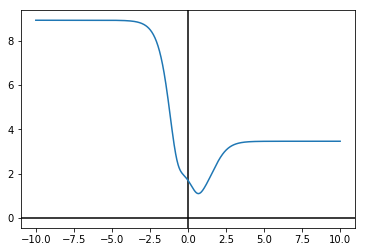

In [129]:
%precision 1
samples = 10000
dim = 10
cov = random_semipositivedefinite(dim)
print('Covariance of multivariate normal')
print(cov)
print('\n')
y = np.random.multivariate_normal(np.zeros(dim),cov,10000).T
neg = NOT(get_conceptor(y,1))
y_hat = np.matmul(neg,y)
print('Absolute value of covariance of negated data at alpha = 1')
print(abs((1/samples)*np.matmul(y_hat,y_hat.T)))
print('\n')

print('Effectiveness of negated conceptor (0 is ideal) for log(alpha)')
alphas = np.linspace(-10,10,1000)
alphas = np.exp(alphas)
z = np.zeros(1000)
for i in range(1000):
    negi = NOT(get_conceptor(y,alphas[i]))
    y_hati = np.matmul(negi,y)
    corr = (1/samples)*np.matmul(y_hati,y_hati.T)
    corr = corr * 1/corr[0][0]
    z[i] = np.linalg.norm(np.identity(dim)-corr)
            
alphas = np.log(alphas)
ax = plt.subplot(111)
ax.axvline(c = 'k')
ax.axhline(c = 'k')
ax.plot(alphas,z)
plt.show()